# Siamese Network Application to Central force problem

### The Hamiltonian

$$H = \frac{p^2}{2m} - \frac{GMm}{r}$$

### Hamiltonian's Equation of motion

$$\dot{x} = \partial_{p_x} H \quad \dot{p}_x = -\partial_x H \\ \dot{y} = \partial_{p_y} H \quad \dot{p}_y = -\partial_y H$$

Assume $m = 1$, 

$$\partial_{p_x/p_y}H = p_{x/y} = \dot{x} = v_x$$
$$ - \partial_x H = - \frac{GM}{r^3}x$$

\begin{align}
\frac{dx}{dt} &= v_x \\
\frac{dv_x}{dt} &= - \frac{GM}{r^3}x
\end{align}

In [120]:
import torch
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [121]:
G = 1
M = 1

In [122]:
def eof(z, t):
    x, y, vx, vy = z
    dxdt = vx
    dydt = vy
    dvxdt = - G * M / (x**2 + y**2)**(3/2) * x
    dvydt = - G * M / (x**2 + y**2)**(3/2) * y
    return [dxdt, dydt, dvxdt, dvydt]

In [123]:
# z0 = [1,1,1/np.sqrt(2) * 1/np.sqrt(np.sqrt(2)),- 1/np.sqrt(2) * 1/np.sqrt(np.sqrt(2))]
z0 = [1,1, 0.3, -0.3]

In [124]:
t = torch.arange(0,5,0.001)

In [125]:
z = odeint(eof, z0, t)

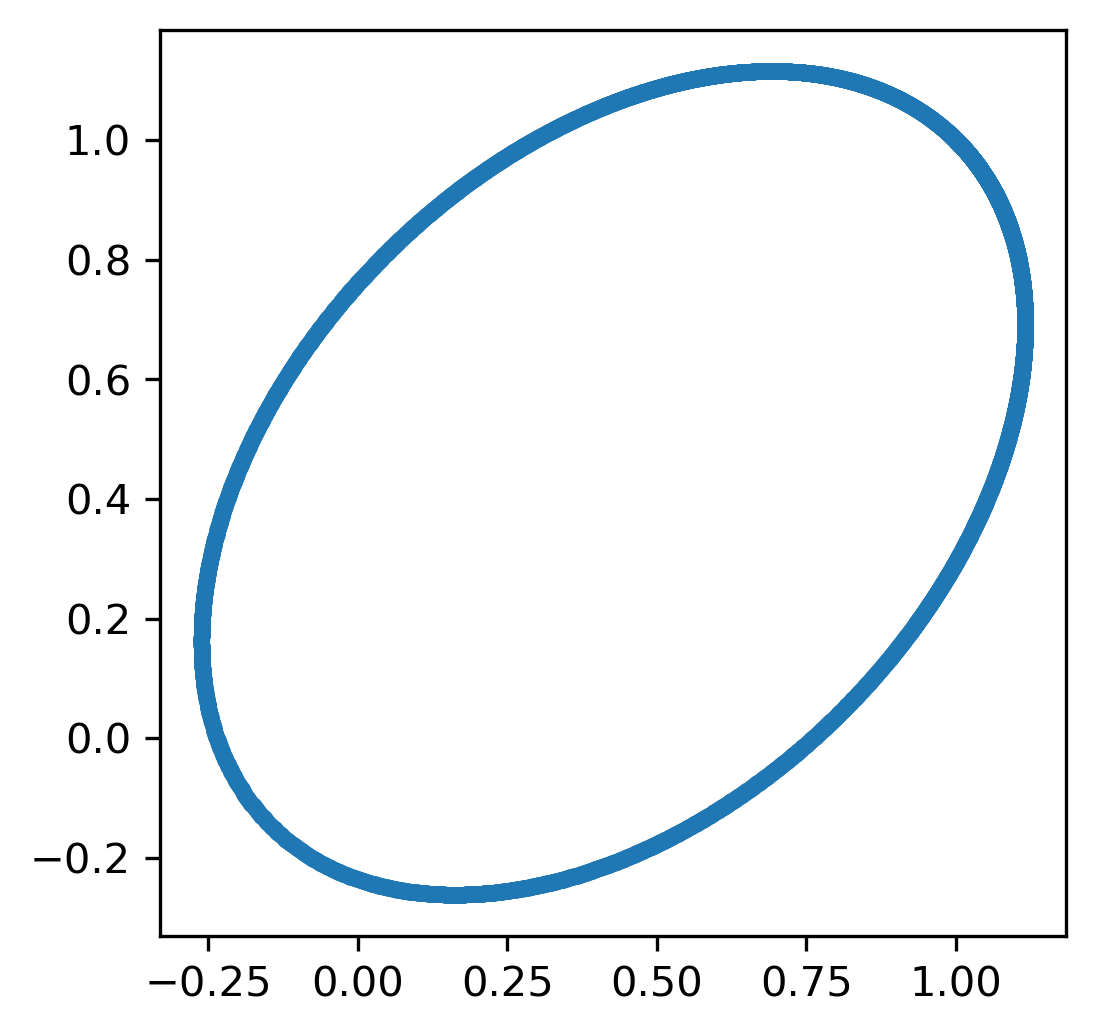

In [126]:
plt.figure(dpi=300)
plt.plot(z[:,0], z[:,1], '.')
ax = plt.gca()
ax.set_aspect("equal")

In [127]:
print(z)

[[ 1.          1.          0.3        -0.3       ]
 [ 1.00029982  0.99969982  0.29964639 -0.3003535 ]
 [ 1.00059929  0.99939929  0.29929268 -0.30070689]
 ...
 [ 1.09251732  0.84632752  0.1421605  -0.43906397]
 [ 1.09265927  0.84588833  0.14174651 -0.43938457]
 [ 1.0928008   0.84544881  0.14133232 -0.43970511]]


## Positive pair

In [128]:
x = torch.Tensor([1,2,3,4,5])

In [130]:
X = torch.column_stack([x, x**2])
X

tensor([[ 1.,  1.],
        [ 2.,  4.],
        [ 3.,  9.],
        [ 4., 16.],
        [ 5., 25.]])

In [137]:
X = X[torch.randperm(5),:]

In [138]:
print(X)

tensor([[ 5., 25.],
        [ 3.,  9.],
        [ 1.,  1.],
        [ 2.,  4.],
        [ 4., 16.]])


------

In [144]:
z_p = torch.Tensor(z[torch.randperm(len(z)),:])
z_p

tensor([[ 0.1584,  0.9088,  0.7634,  0.5924],
        [ 1.0759,  0.8894,  0.1834, -0.4060],
        [ 0.5855,  1.1065,  0.5947,  0.0990],
        ...,
        [ 0.2217,  0.9547,  0.7449,  0.5015],
        [ 1.0842,  0.4900, -0.1921, -0.6402],
        [ 1.1146,  0.7265,  0.0316, -0.5178]])

## Negative Pair

원운동을 하려면 $r$ 과 $v$ 가 수직관계이므로 내적해서 0, 그리고 $v = \sqrt{\frac{GM}{r}}$

In [155]:
z0_n = [2,1,1/np.sqrt(5)*1/np.sqrt(np.sqrt(5)) ,-2/np.sqrt(5)*1/np.sqrt(np.sqrt(5))]

In [160]:
t_n = torch.arange(0,50,0.01)
z_n = odeint(eof, z0_n, t_n)

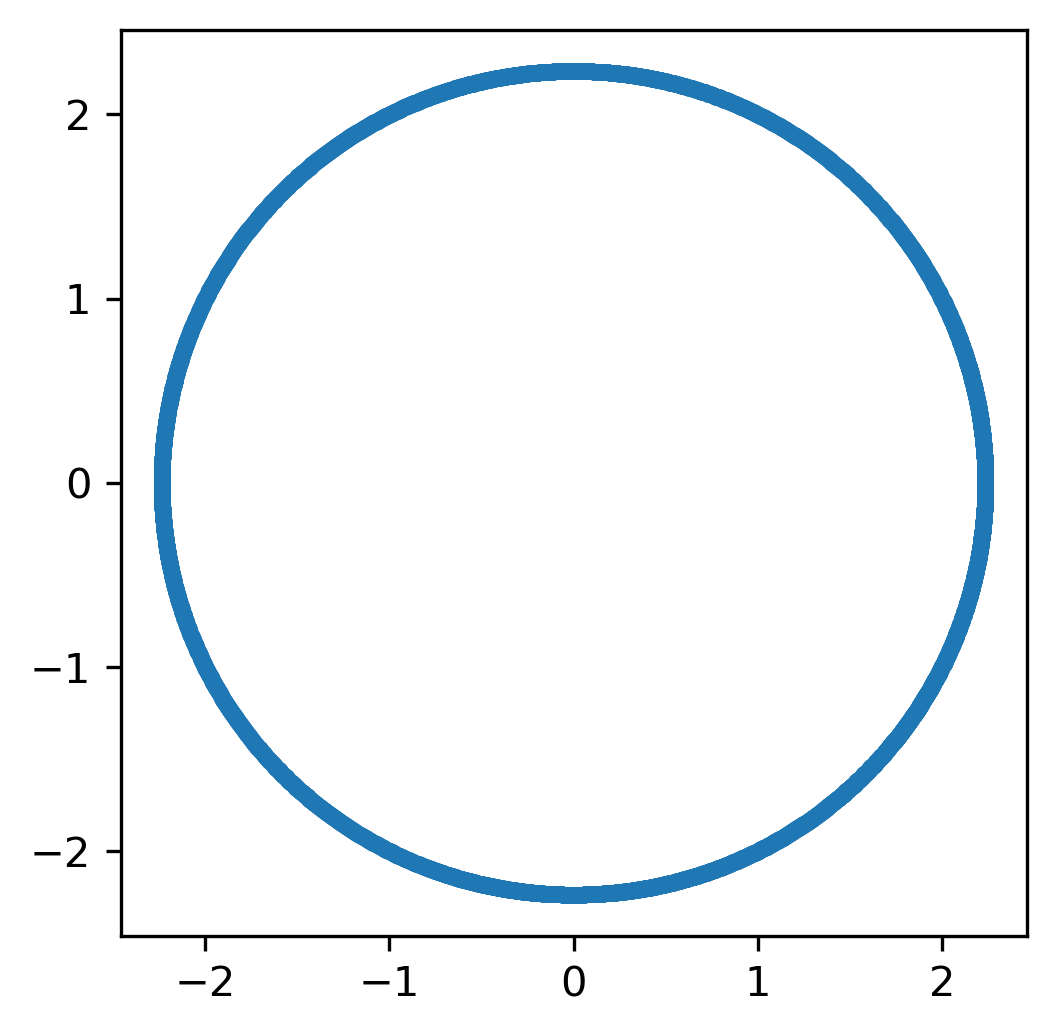

In [161]:
plt.figure(dpi=300)
plt.plot(z_n[:,0], z_n[:,1], '.')
ax = plt.gca()
ax.set_aspect("equal")